In [1]:
#importing library's 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plp

from sklearn.linear_model import  LinearRegression

In [2]:
#importing csv file data into dataframe
data = pd.read_csv("auto_mpg_data_original.csv",header = None,sep="\s+")

In [3]:
#adding coloumn names to the dataset
data.columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]

In [4]:
#dataset summary
data.shape
data.info()
data.describe().transpose()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model_year      406 non-null float64
origin          406 non-null float64
car_name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [5]:
#loop to convert set of variables into catgorical
for col in ["cylinders","model_year","origin"]:
    data[col] = data[col].astype("category")

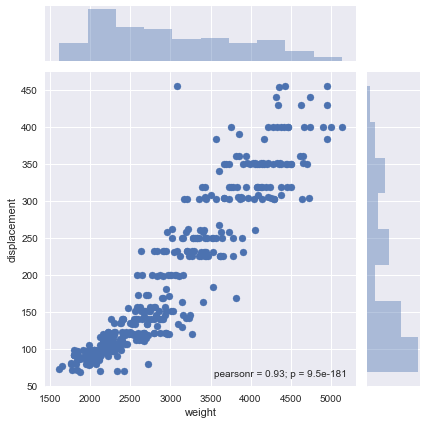

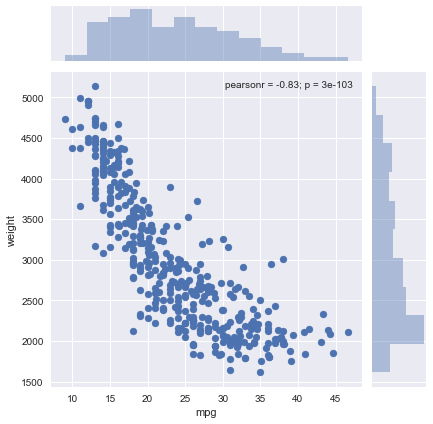

In [8]:
#visulazing the dataset
%matplotlib inline 
sns.jointplot(x="weight",y="displacement",data=data,kind="scatter")
sns.jointplot(x="mpg",y="weight",data=data,kind="scatter")

In [9]:
#checking for missing values in data
data.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [10]:
#filtering the rows containing missing values
missing_data_df = data[data.isnull().any(axis=1)]
not_missing_data_df = data[~data.isnull().any(axis=1)]

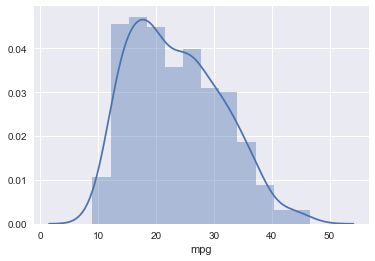

In [13]:
#visualizing "mpg" and "horsepower" without missing values
sns.distplot(not_missing_data_df["mpg"])
sns.distplot(not_missing_data_df["horsepower"])

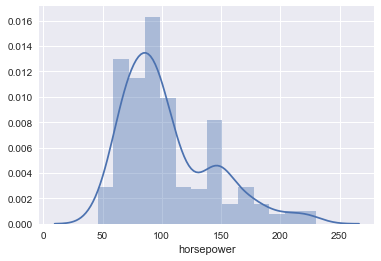

In [14]:
#visualizing "horsepower" without missing values
sns.distplot(not_missing_data_df["horsepower"])

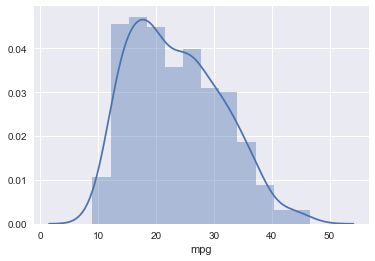

In [15]:
#imputing missing values of "mpg" column with mean value
data.fillna(data[["mpg"]].mean(),inplace=True)
sns.distplot(not_missing_data_df["mpg"])

In [16]:
#correlation matrix for the dataset to select highly correlated variables with missing values column "horsepower"
corr_df = data.corr(method="pearson")

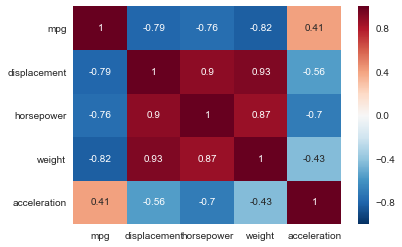

In [17]:
#visulaizing correlation dataframe
sns.heatmap(corr_df,annot=True)

In [19]:
#imputing missing values of "horse power" with linear regression
lreg = LinearRegression()
train_df = not_missing_data_df[["displacement","weight"]]
lm_train = lreg.fit(train_df,not_missing_data_df.horsepower)
data['horsepower']= data.apply(
    lambda row: 
            0.25743277 * row.displacement + 0.00958711 * row.weight + 25.874947903262651 
            if np.isnan(row.horsepower) else row.horsepower, axis=1)

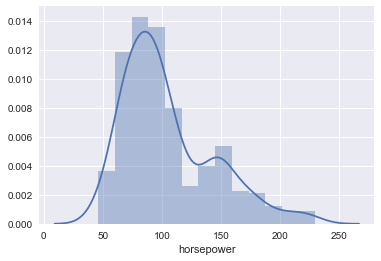

In [21]:
#visualizing "horsepower" varaible after imputing missing values with LinearRegression
sns.distplot(data["horsepower"])